In [1]:
#brew install gcc@8
#git clone --recursive https://github.com/dmlc/xgboost
#cd xgboost
#vi config.mk
#uncomment and change to 
#export CC = gcc-8
#export CXX = g++-8
#change Makefile
#export CC = $(if $(shell which clang), clang, gcc-8)
#export CXX = $(if $(shell which clang++), clang++, g++-8)
#make clean_all && make -j4
#cd python-package; python setup.py install

In [93]:
#import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBRegressor
import pickle

In [94]:
df = pd.read_csv('../data/processed/kaggle_sample_train.csv')
df_type = pd.read_csv('../data/processed/kaggle_sample_type.csv')

In [95]:
#Function to get target variable
def get_target(df,df_type):
    for c in df:
        if (column_type(c,df_type) == 'Flag_Continuous' or column_type(c,df_type) == 'Flag_Categorical'):
            return(c)

In [96]:
# funtion to get column type
def column_type(column_name,df_type):
    return (df_type.loc[df_type['Variable'] == column_name, 'Type'].iloc[0])

In [97]:
target_name = get_target(df,df_type)
X = df.drop(columns = target_name)
y = df[target_name]

In [98]:
X.head()

,Calendar_Year,Model_Year,Blind_Make,Cat1,Cat2,Cat3,Cat6,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,NVCat
0,1,2,3,1,2,2,2,0,0,1,2,3,4,0
1,1,2,0,1,2,5,1,2,1,2,4,3,5,0
2,1,2,1,1,2,5,2,2,1,2,1,3,2,2
3,0,2,1,1,2,5,2,2,1,1,4,5,2,2
4,1,1,0,0,2,4,4,2,1,2,4,5,5,2


In [99]:
y.head()

0   -0.105463
1   -0.105463
2   -0.105463
3   -0.105463
4   -0.105463
Name: Claim_Amount, dtype: float64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

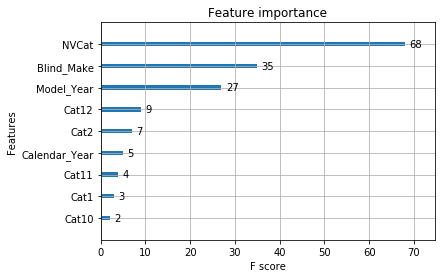

In [101]:
model = XGBRegressor(max_depth=1, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:linear',eval_metric='rmse')
model.fit(X_train, y_train)

# prediction
pred_test = model.predict(X_test)

# important features
plot_importance(model)
plt.show() 

In [102]:
print('MSE:', mean_squared_error(y_test, pred_test))
print('R Square:', r2_score(y_test, pred_test))

MSE: 0.7330025861559677
R Square: -0.004759173223265023


In [103]:
#Set the different values of parameters to be tested
parameters = {'max_depth':[1,3,5,7,9],'learning_rate':[0.1],'n_estimators':[1,3,5,10,50,100],'silent':['True'],'objective':['reg:linear'],'eval_metric':['rmse']}
model = xgb.XGBRegressor()
xgb_regressor = GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(X_train,y_train)
print(xgb_regressor.best_params_)
print(xgb_regressor.best_score_)


{'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'objective': 'reg:linear', 'silent': 'True'}
-1.0566245274841088


In [88]:
predictions = xgb_regressor.predict(X_test)
predictions = pd.DataFrame(predictions)

In [89]:
predictions

,0
0,0.507121
1,0.507121
2,0.507121
3,0.507121
4,0.507121
5,0.507121
6,0.507121
7,0.507121
8,0.507121
9,0.507121


In [92]:
# save the model to disk
filename = '../models/XGBRegressor.sav'
pickle.dump(xgb_regressor, open(filename, 'wb'))

In [ ]:
"""
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
"""